<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd              
import seaborn as sns            
import os
import warnings
os.chdir(r"C:\Formation")

import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%pylab inline

plt.style.use('seaborn-darkgrid')
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
print(os.getcwd())
os.chdir(r"C:\Formation")
print(os.getcwd())

meteo=pd.read_csv('donnees/tableMeteoMmoyenneJournaliere.csv')
meteo.head()

C:\Formation
C:\Formation


,T01_01,T01_02,T01_03,T01_04,T01_05,T01_06,T01_07,T01_08,T01_09,T01_10,...,P12_23,P12_24,P12_25,P12_26,P12_27,P12_28,P12_29,P12_30,P12_31,Ville
0,3.93,4.44,3.89,4.27,4.27,4.38,4.96,4.92,4.74,4.21,...,100.93,100.62,100.56,100.68,100.46,100.55,100.73,100.74,100.84,Abbeville
1,9.29,9.81,9.56,9.20,8.83,9.23,9.36,9.38,9.51,9.61,...,101.90,101.79,101.63,101.47,101.55,101.51,101.59,101.75,101.72,Ajaccio
2,4.12,4.41,4.11,4.17,4.34,4.54,4.36,4.83,4.77,4.67,...,100.23,99.93,99.90,99.99,99.72,99.82,99.99,100.03,100.08,Alencon
3,1.90,2.21,1.97,1.76,2.19,1.83,2.48,2.60,2.55,2.14,...,98.86,98.67,98.54,98.60,98.46,98.38,98.67,98.75,98.79,Bale-Mulhouse
4,8.96,9.65,10.37,9.28,9.17,8.99,9.45,9.64,9.49,9.65,...,101.86,101.75,101.52,101.41,101.47,101.36,101.53,101.67,101.72,Bastia


In [3]:
meteo.shape

(42, 1465)

In [4]:
x = meteo.values[:,:1464]
ville = meteo.Ville

In [5]:
from sklearn.preprocessing import scale
x = scale(x)

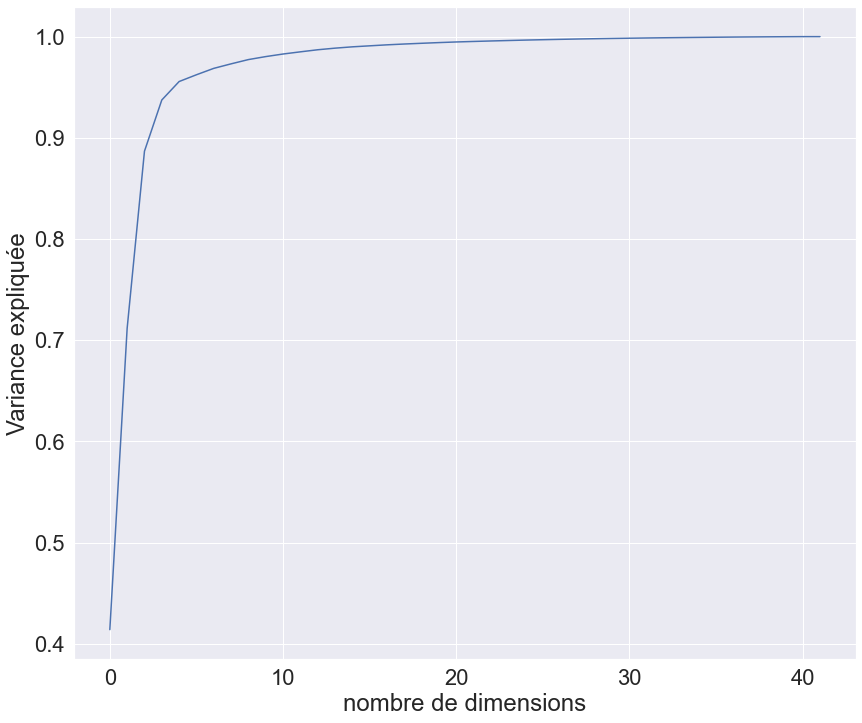

In [6]:
from sklearn.decomposition import PCA
pca = PCA().fit(x)
plt.figure(figsize=(14,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de dimensions')
plt.ylabel('Variance expliquée');

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
x_red = pca.fit(x).transform(x)
dfPCA = pd.DataFrame(data=x_red, columns=['Dim1', 'Dim2', 'Dim3', 'Dim4', 'Dim5'])
dfPCA['Ville']= ville
dfPCA.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Ville
0,-5.143093,-28.263275,1.113159,-2.807859,-4.222921,Abbeville
1,-22.953399,21.026096,-13.316346,12.705632,4.231792,Ajaccio
2,7.794759,-17.610817,-9.316877,-2.148869,0.291868,Alencon
3,26.889062,-5.185913,-13.213791,-1.976655,-3.830246,Bale-Mulhouse
4,-19.684191,28.870433,-18.568462,16.774423,0.338942,Bastia


<Figure size 432x288 with 0 Axes>

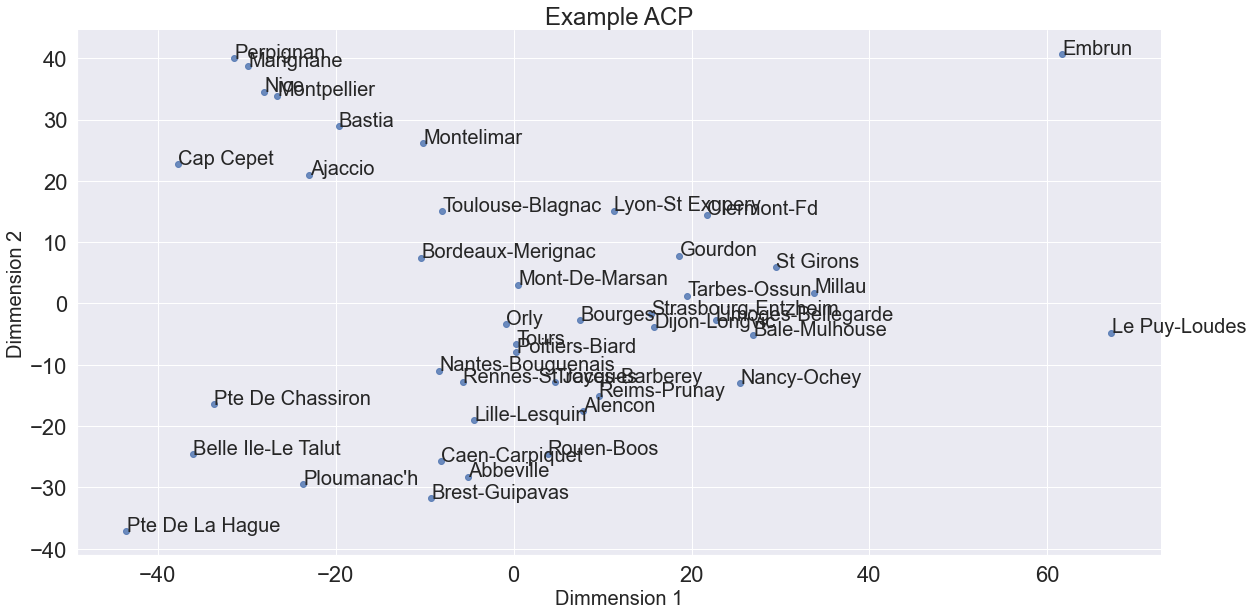

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', data=dfPCA, fit_reg=False, 
                size = 8, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.Ville, plt.gca())

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
#Z = linkage(dfPCA.iloc[:,0:5], 'ward')
#Z = linkage(dfPCA.iloc[:,:-1], 'ward')
Z = linkage(dfPCA.drop(columns='Ville'), metric='euclidean', method='ward')
#Z = linkage(dfPCA.iloc[:,:5], 'ward')


In [11]:
Z

array([[ 30.        ,  40.        ,   2.33608289,   2.        ],
       [ 25.        ,  34.        ,   4.25093079,   2.        ],
       [  0.        ,   9.        ,   6.12035569,   2.        ],
       [  2.        ,  41.        ,   8.21257681,   2.        ],
       [ 27.        ,  42.        ,   9.89909621,   3.        ],
       [  7.        ,  12.        ,   9.92441282,   2.        ],
       [  1.        ,   4.        ,  11.46801661,   2.        ],
       [ 19.        ,  28.        ,  11.90854195,   2.        ],
       [ 33.        ,  45.        ,  12.57857039,   3.        ],
       [ 16.        ,  35.        ,  12.64422397,   2.        ],
       [ 36.        ,  38.        ,  12.75137394,   2.        ],
       [ 37.        ,  47.        ,  13.35291686,   3.        ],
       [ 23.        ,  49.        ,  14.28019363,   3.        ],
       [  5.        ,  31.        ,  14.60296969,   2.        ],
       [ 44.        ,  51.        ,  15.48607989,   4.        ],
       [ 17.        ,  24

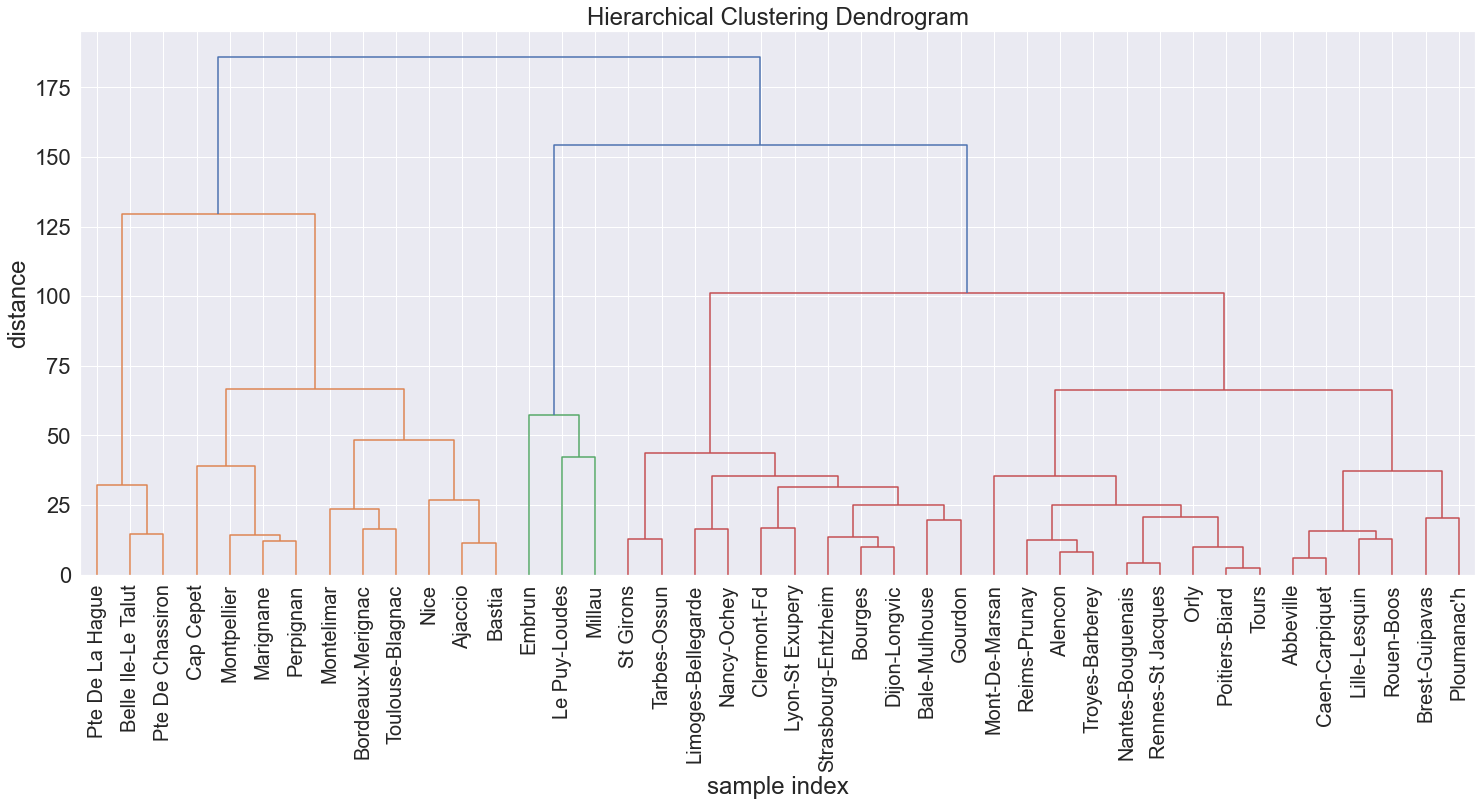

In [12]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = dfPCA.Ville.values)
plt.show()

In [34]:
def afficheDendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    titre = kwargs.pop('titre', None)
    
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
        
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title(titre)
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

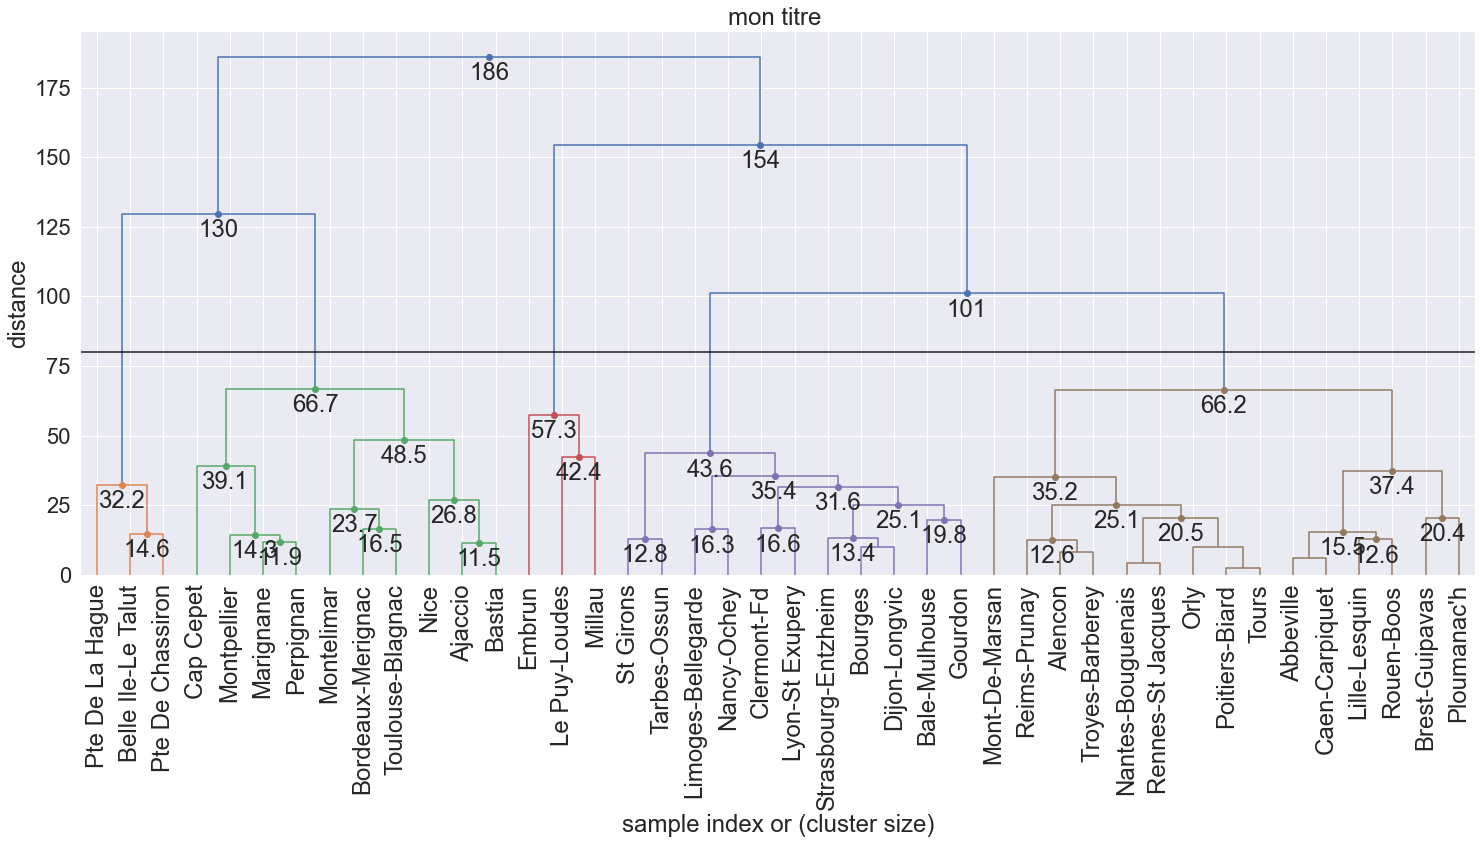

In [37]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=42,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    max_d=80,  # plot a horizontal cut-off line
    labels = dfPCA.Ville.values,
    titre = 'mon titre '
)
plt.show()

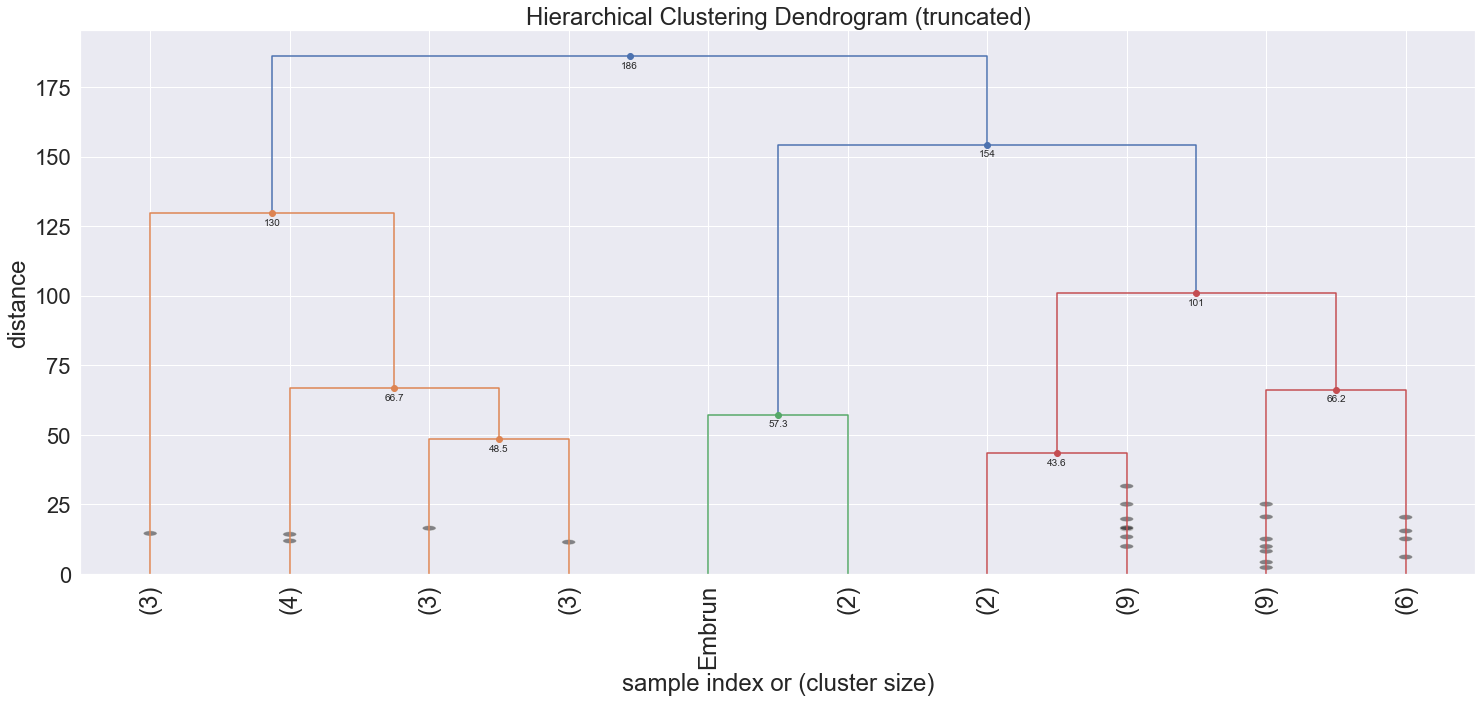

In [23]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=10,
    leaf_rotation=90.,
    leaf_font_size=24.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
    labels = dfPCA.Ville.values
)
plt.show()

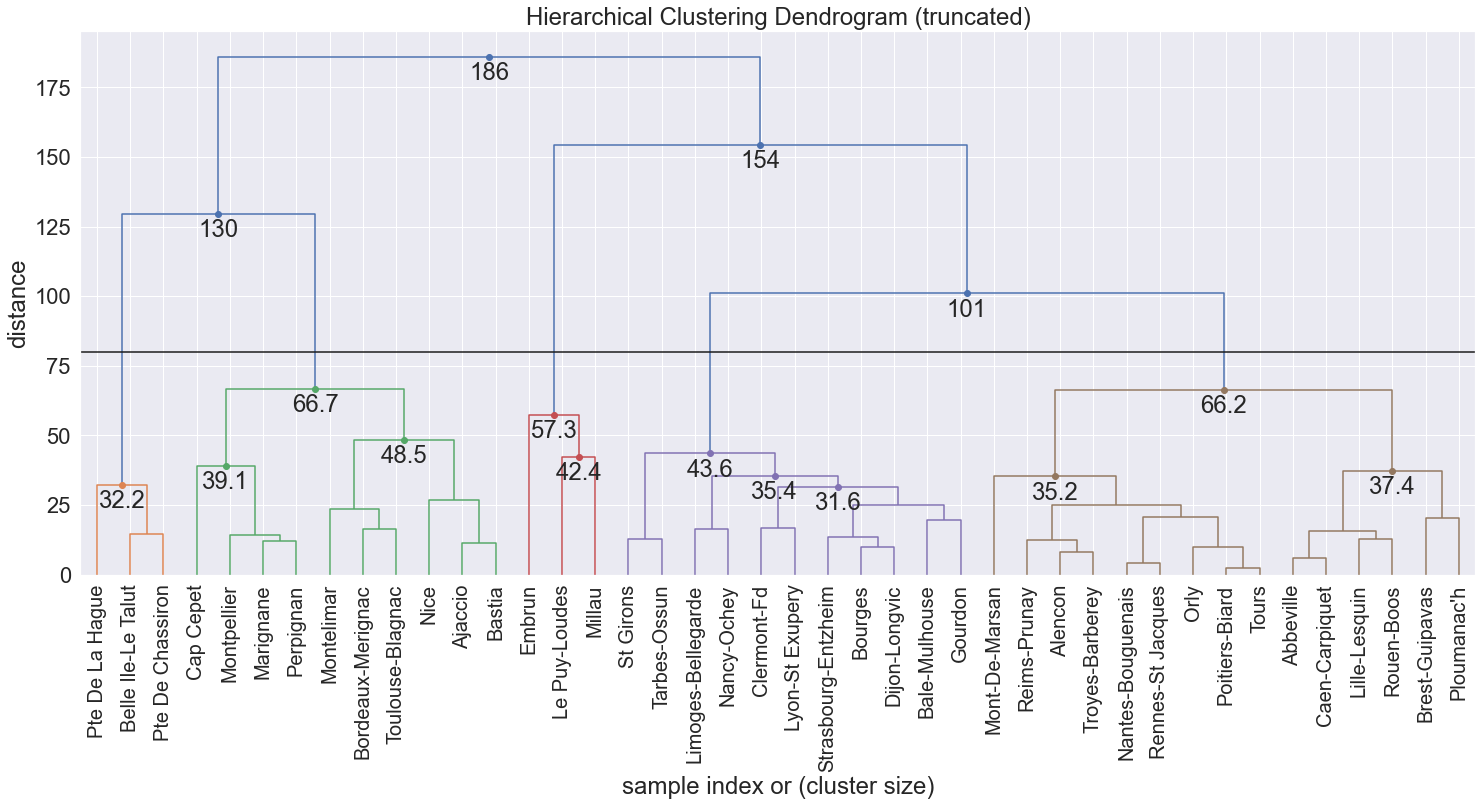

In [32]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=30,
    max_d=80,  # plot a horizontal cut-off line
    labels = dfPCA.Ville.values
)
plt.show()

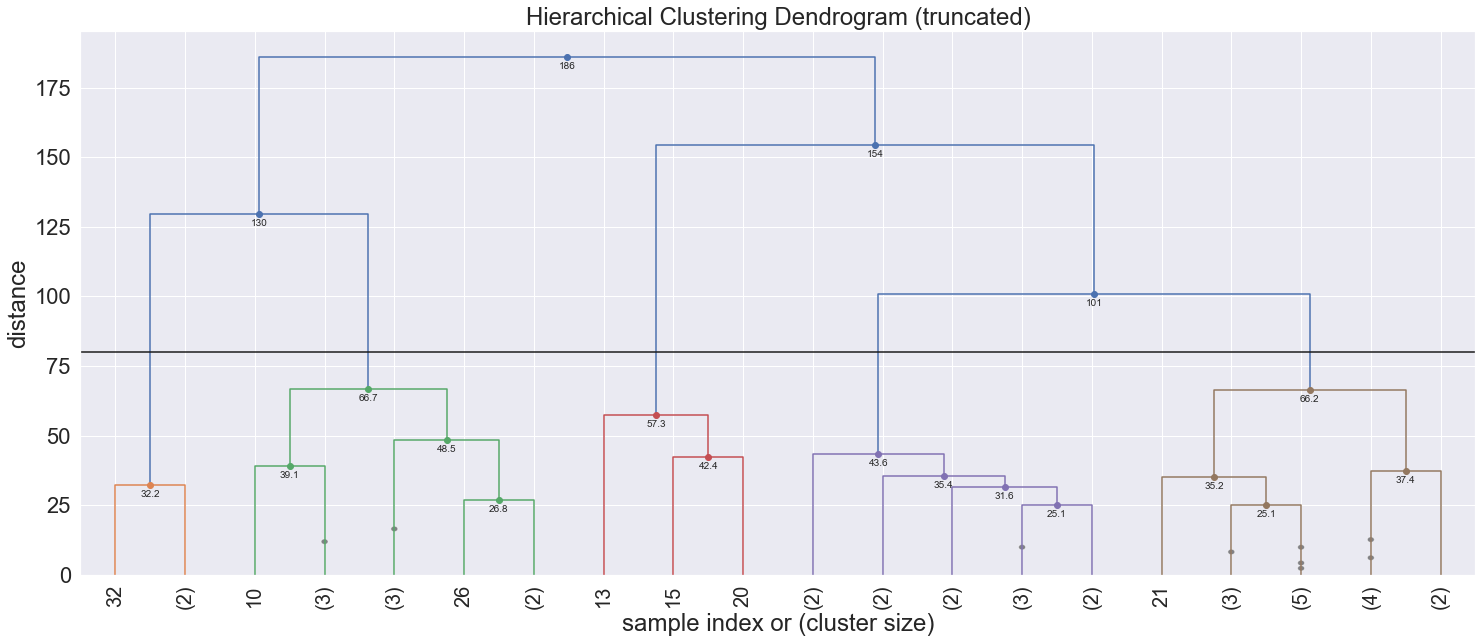

In [25]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=10,
    max_d=80,  # plot a horizontal cut-off line
)
plt.show()

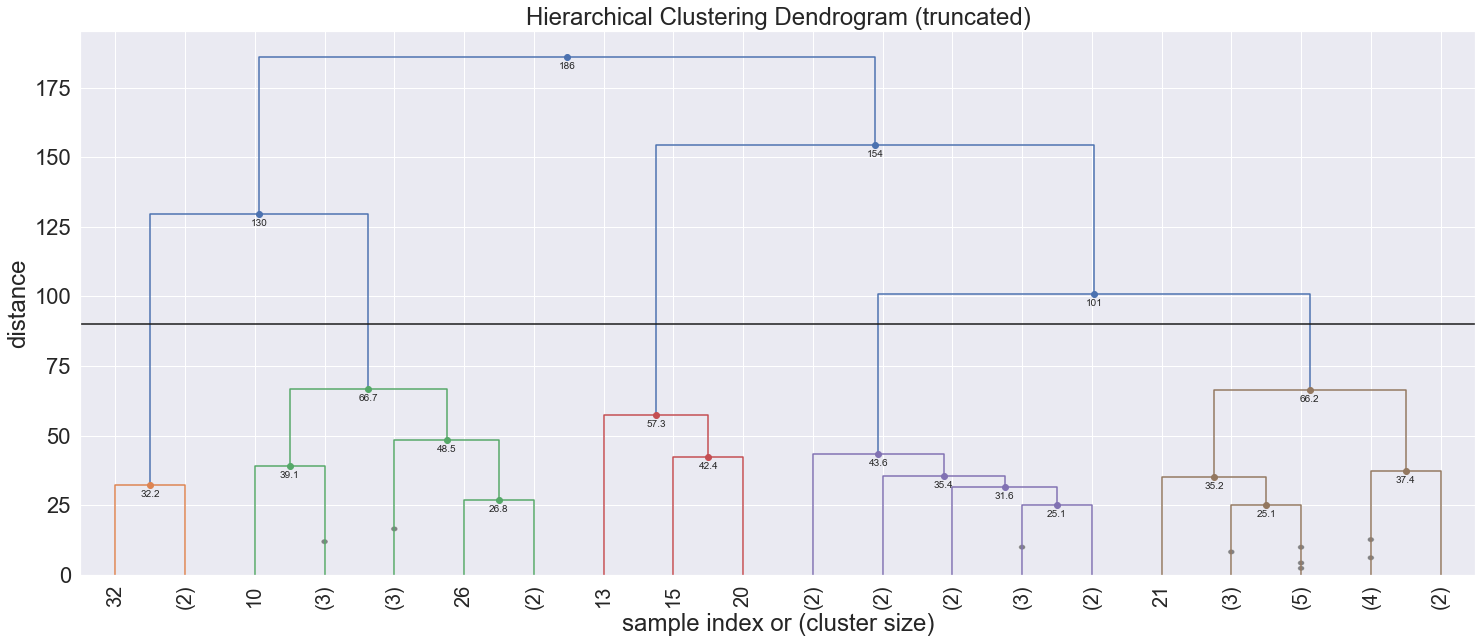

In [26]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=10,
    max_d=90,  # plot a horizontal cut-off line
)
plt.show()

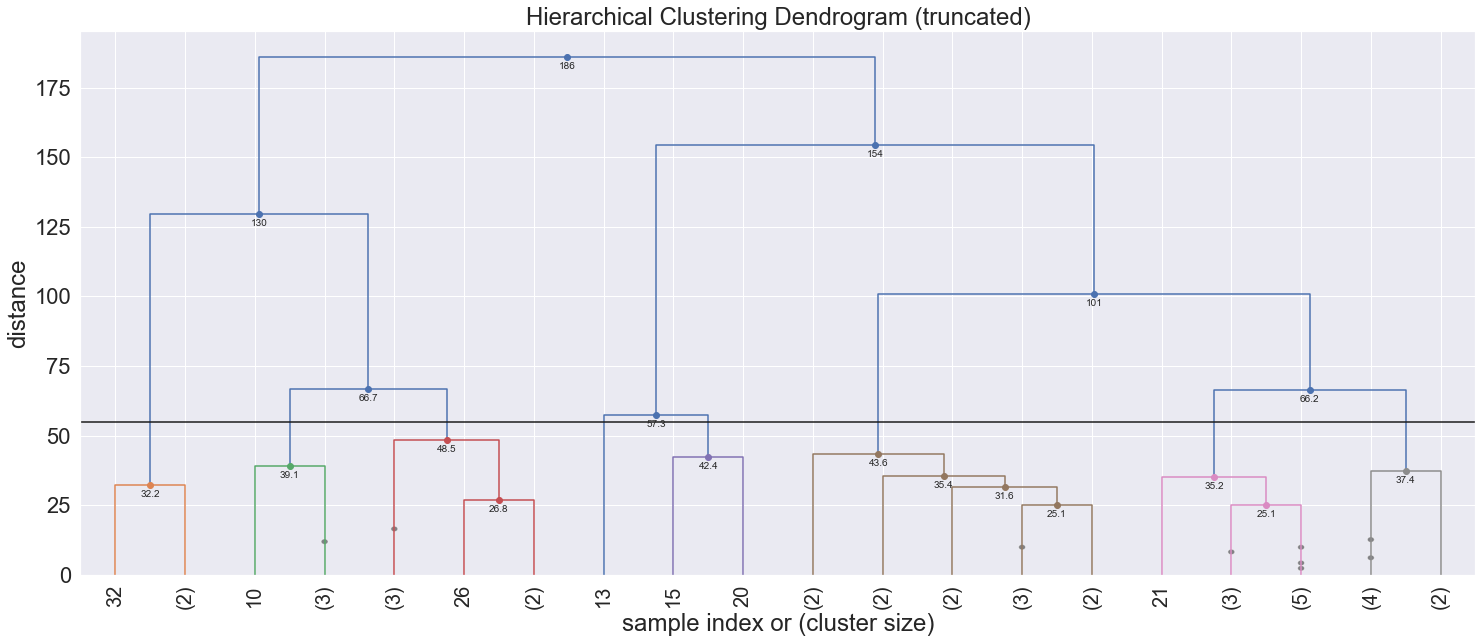

In [27]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=10,
    max_d=55,  # plot a horizontal cut-off line
)
plt.show()

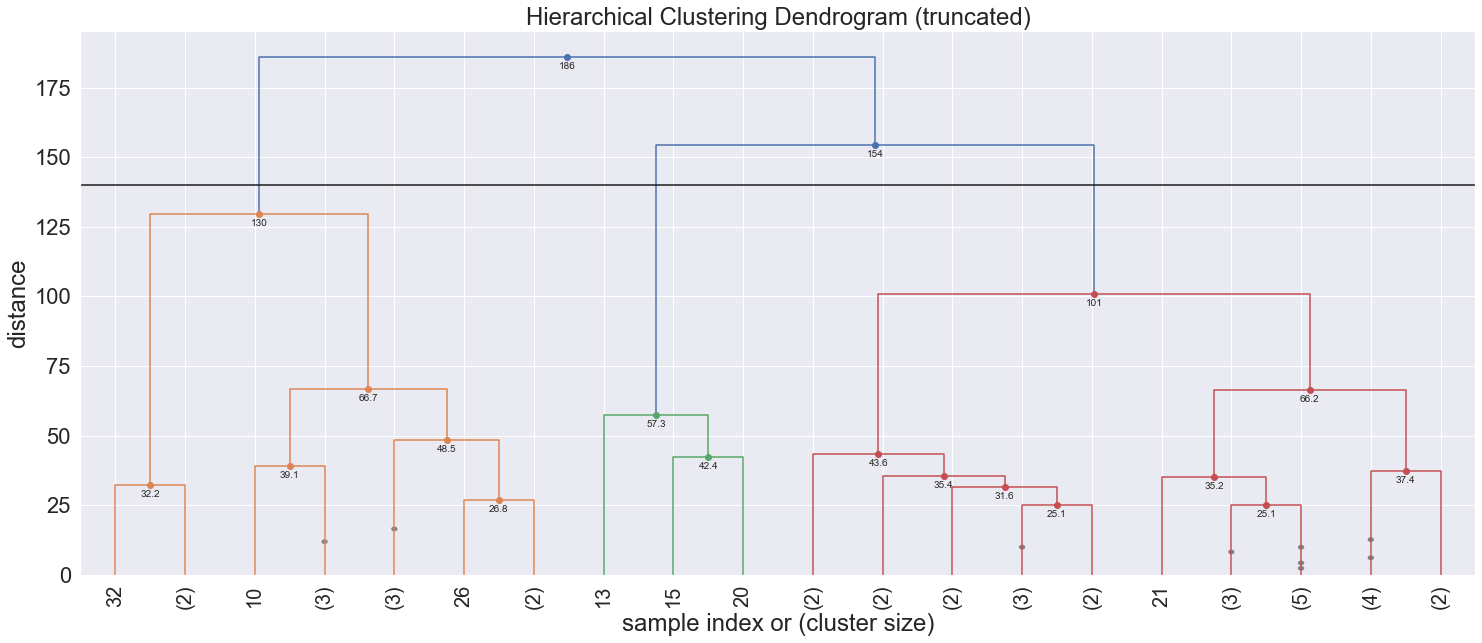

In [28]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=10,
    max_d=140,  # plot a horizontal cut-off line
)
plt.show()

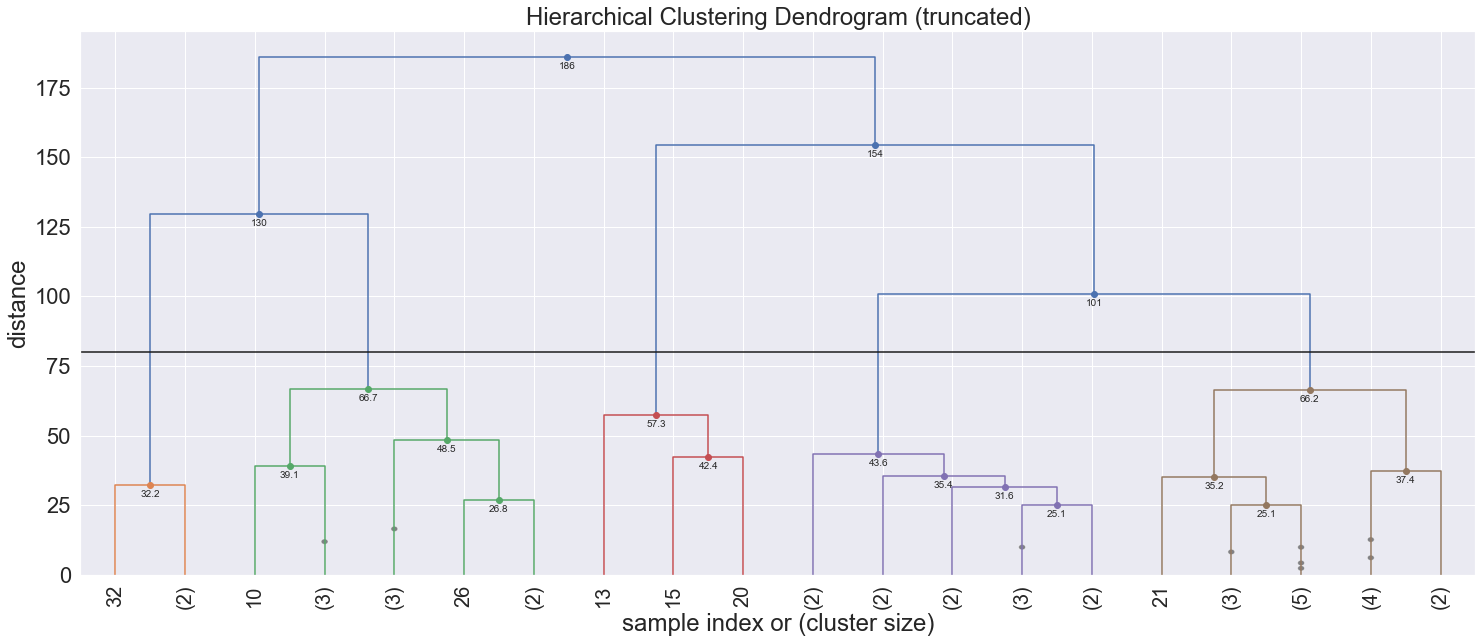

In [29]:
plt.figure(figsize=(25, 10))
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=10,
    max_d=80,  # plot a horizontal cut-off line
)
plt.show()

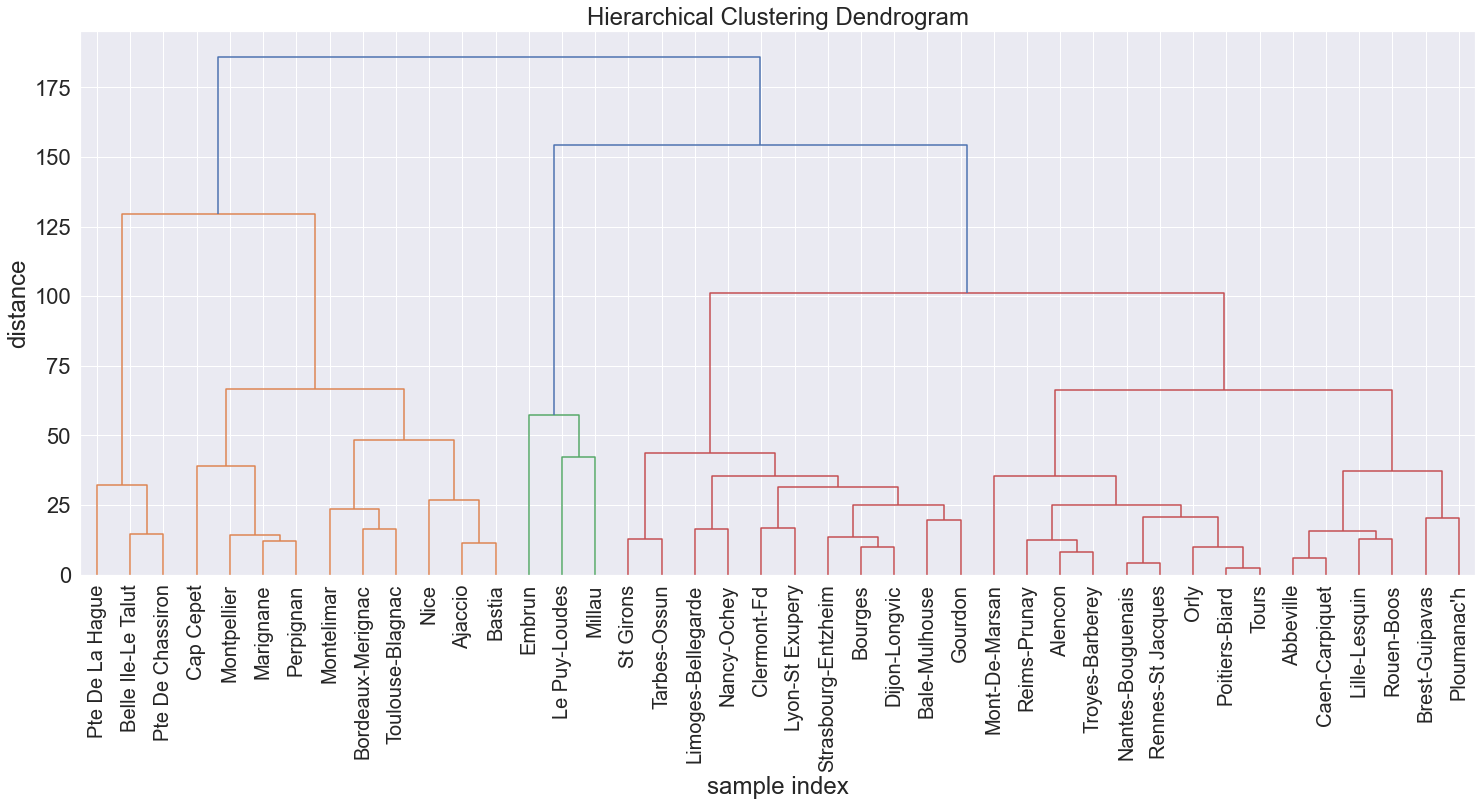

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
#Z = linkage(dfPCA.iloc[:,0:5], 'ward')
#Z = linkage(dfPCA.iloc[:,:-1], 'ward')
Z = linkage(dfPCA.drop(columns='Ville'), 'ward')
#Z = linkage(dfPCA.iloc[:,:5], 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram( Z,leaf_rotation=90.,leaf_font_size=20.,
           labels = dfPCA.Ville.values)
plt.show()

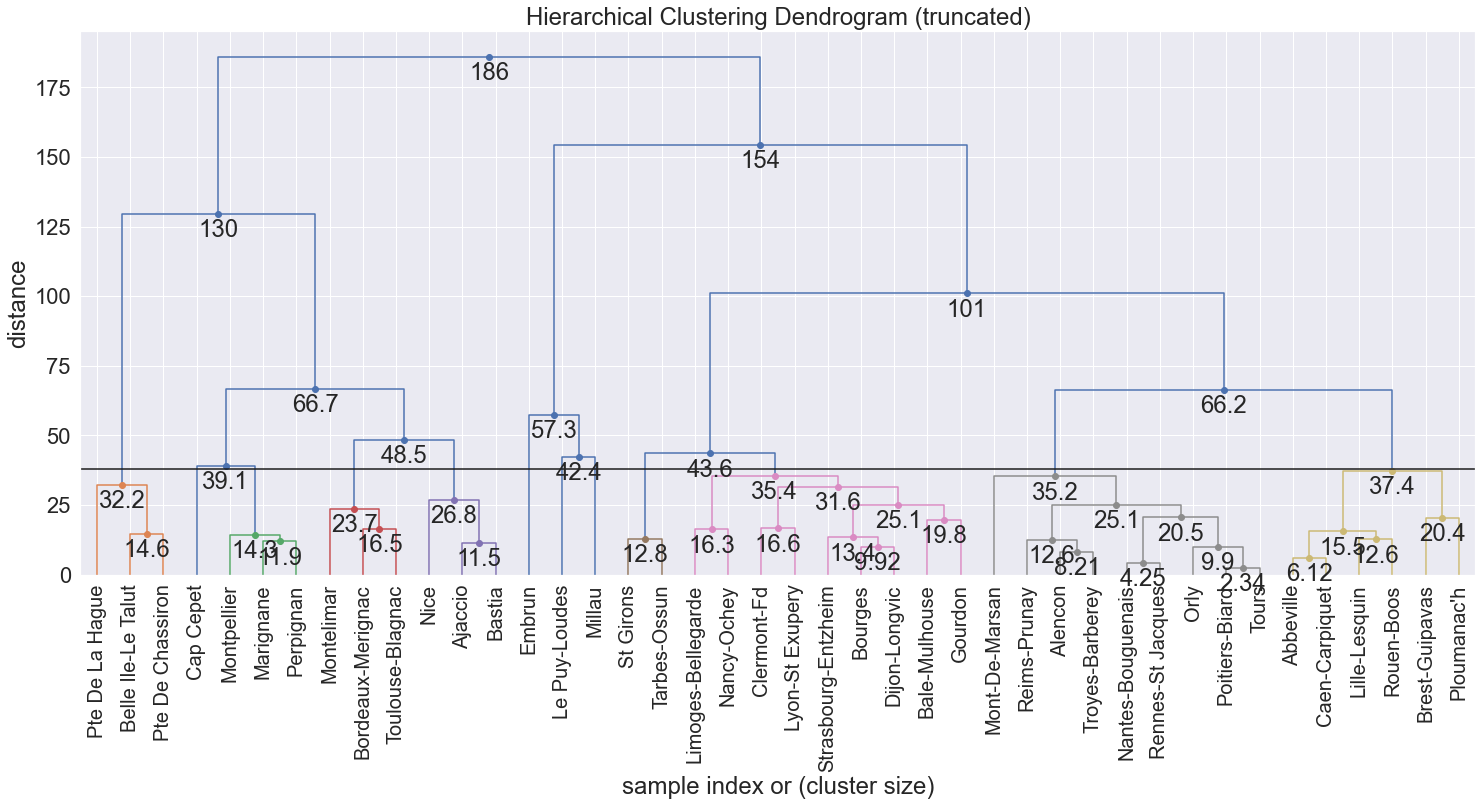

In [33]:
plt.figure(figsize=(25, 10))
sns.set(font_scale=2)
afficheDendrogram(
    Z,
    truncate_mode='lastp',
    p=42,
    leaf_rotation=90.,
    leaf_font_size=20.,
    show_contracted=True,
    annotate_above=1,
    max_d=38,  # plot a horizontal cut-off line
    labels = dfPCA.Ville.values
)
plt.show()    

In [22]:
Z.shape

(41, 4)

In [23]:
from scipy.cluster.hierarchy import fcluster
dfPCA['Classe80']=fcluster(Z, t=80, criterion='distance')
dfPCA['Classe120']=fcluster(Z, t=120, criterion='distance')
dfPCA['Classe135']=fcluster(Z, t=135, criterion='distance')


In [24]:
dfPCA.head()

,Dim1,Dim2,Dim3,Dim4,Dim5,Ville,Classe80,Classe120,Classe135
0,-5.143093,-28.263275,1.113159,-2.807859,-4.222923,Abbeville,5,4,3
1,-22.953399,21.026096,-13.316346,12.705632,4.231792,Ajaccio,2,2,1
2,7.794759,-17.610817,-9.316877,-2.148869,0.291873,Alencon,5,4,3
3,26.889062,-5.185913,-13.213791,-1.976655,-3.830247,Bale-Mulhouse,4,4,3
4,-19.684191,28.870433,-18.568462,16.774423,0.338930,Bastia,2,2,1


<Figure size 432x288 with 0 Axes>

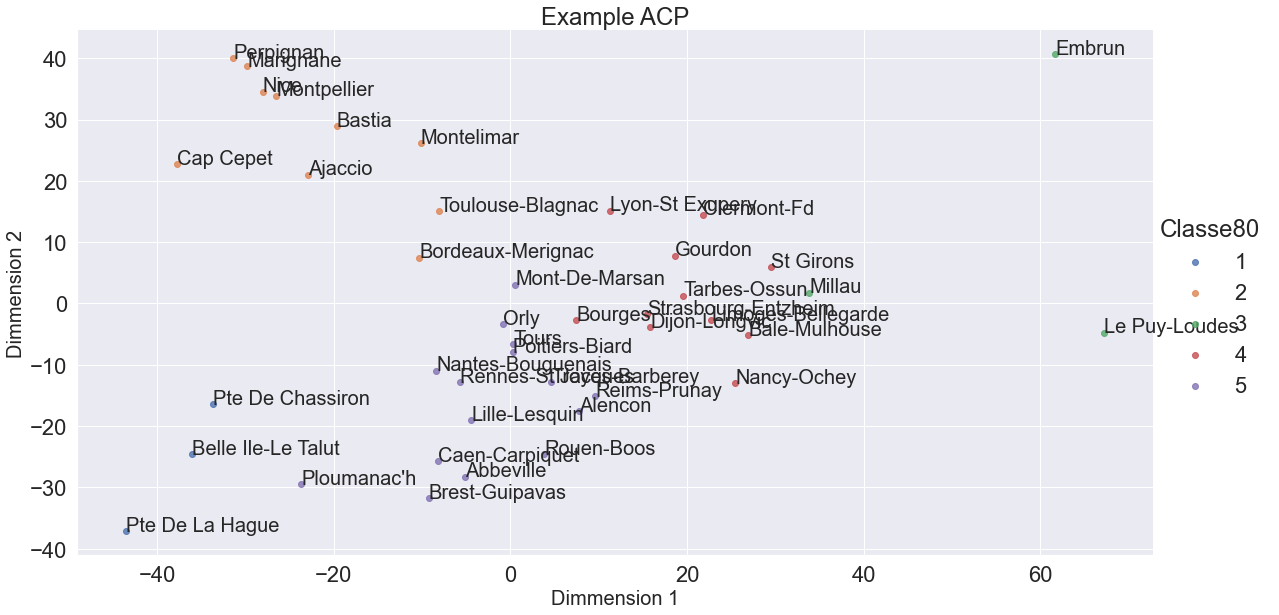

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', hue='Classe80',data=dfPCA, fit_reg=False, 
                size = 8, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.Ville, plt.gca())

<Figure size 432x288 with 0 Axes>

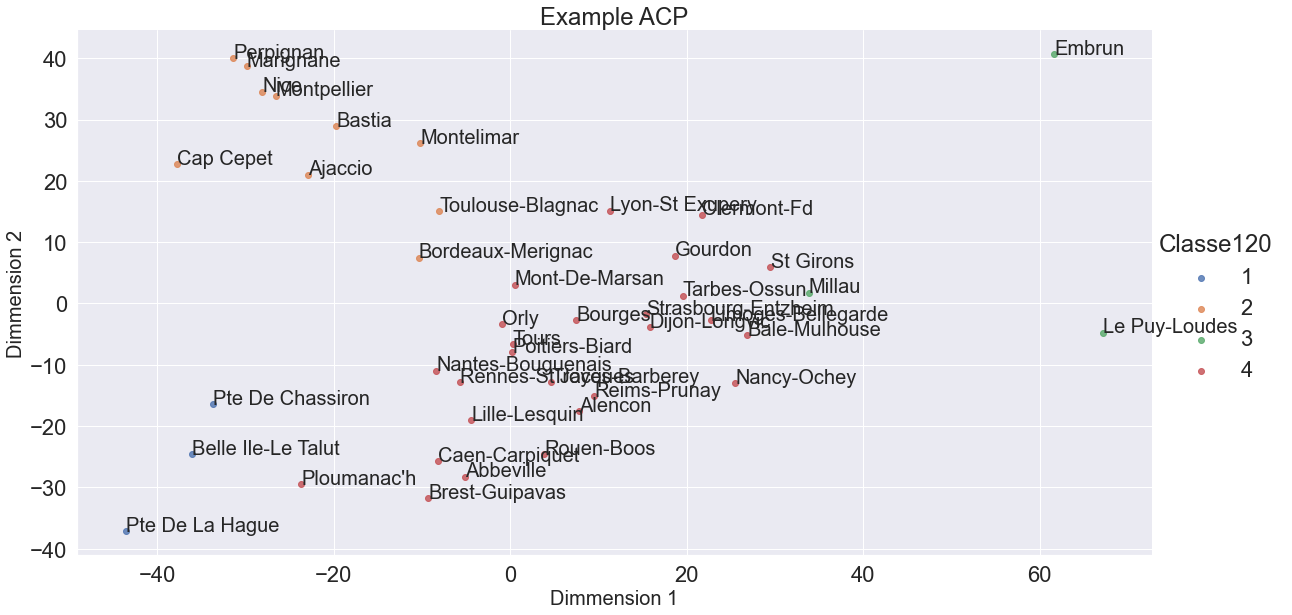

In [26]:

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', hue='Classe120',data=dfPCA, fit_reg=False, 
                size = 8, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.Ville, plt.gca())

<Figure size 432x288 with 0 Axes>

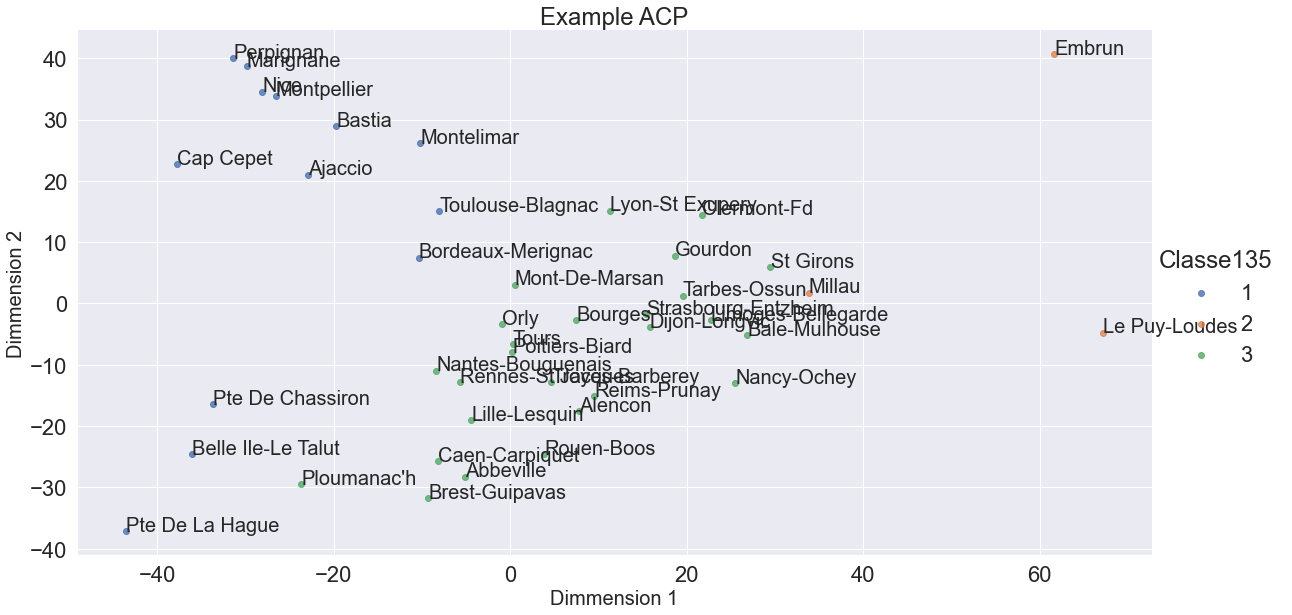

In [27]:

plt.figure()

ax = sns.lmplot(x='Dim1',y='Dim2', hue='Classe135',data=dfPCA, fit_reg=False, 
                size = 8, aspect =2 ) 

plt.title('Example ACP', fontproperties=font2)
plt.xlabel('Dimmension 1', fontproperties=font1)
plt.ylabel('Dimmension 2', fontproperties=font1)


def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), fontproperties=font1)

label_point(dfPCA.Dim1, dfPCA.Dim2, dfPCA.Ville, plt.gca())

In [28]:
dfPCA.iloc[:,:-4].head()

,Dim1,Dim2,Dim3,Dim4,Dim5
0,-5.143093,-28.263275,1.113159,-2.807859,-4.222923
1,-22.953399,21.026096,-13.316346,12.705632,4.231792
2,7.794759,-17.610817,-9.316877,-2.148869,0.291873
3,26.889062,-5.185913,-13.213791,-1.976655,-3.830247
4,-19.684191,28.870433,-18.568462,16.774423,0.338930


For n_clusters = 2 The average silhouette_score is : 0.34004917624709924
For n_clusters = 3 The average silhouette_score is : 0.3172199037212187
For n_clusters = 4 The average silhouette_score is : 0.3714167110557162
For n_clusters = 5 The average silhouette_score is : 0.3245939344005737
For n_clusters = 6 The average silhouette_score is : 0.32702366863937204
For n_clusters = 7 The average silhouette_score is : 0.32185183969242476
For n_clusters = 8 The average silhouette_score is : 0.26769387734706596
For n_clusters = 9 The average silhouette_score is : 0.2941301539599759
For n_clusters = 10 The average silhouette_score is : 0.284963922411221
For n_clusters = 11 The average silhouette_score is : 0.27785856029630684
For n_clusters = 12 The average silhouette_score is : 0.2468640925787001


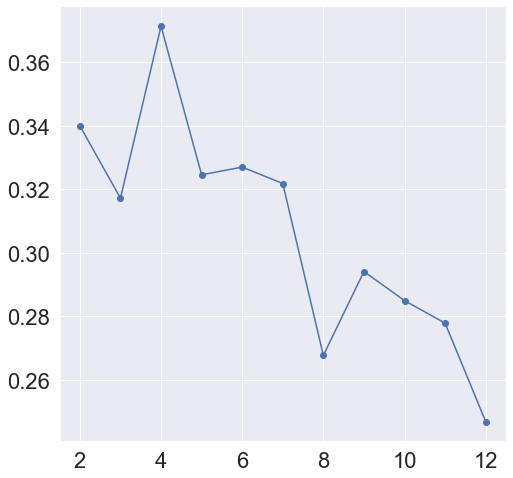

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = dfPCA.iloc[:,:-4]


range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

silhouettes = []
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    clusterer.fit(X)
    cluster_labels = clusterer.predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)

plt.figure(figsize=(8,8))    
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.34004917624709924


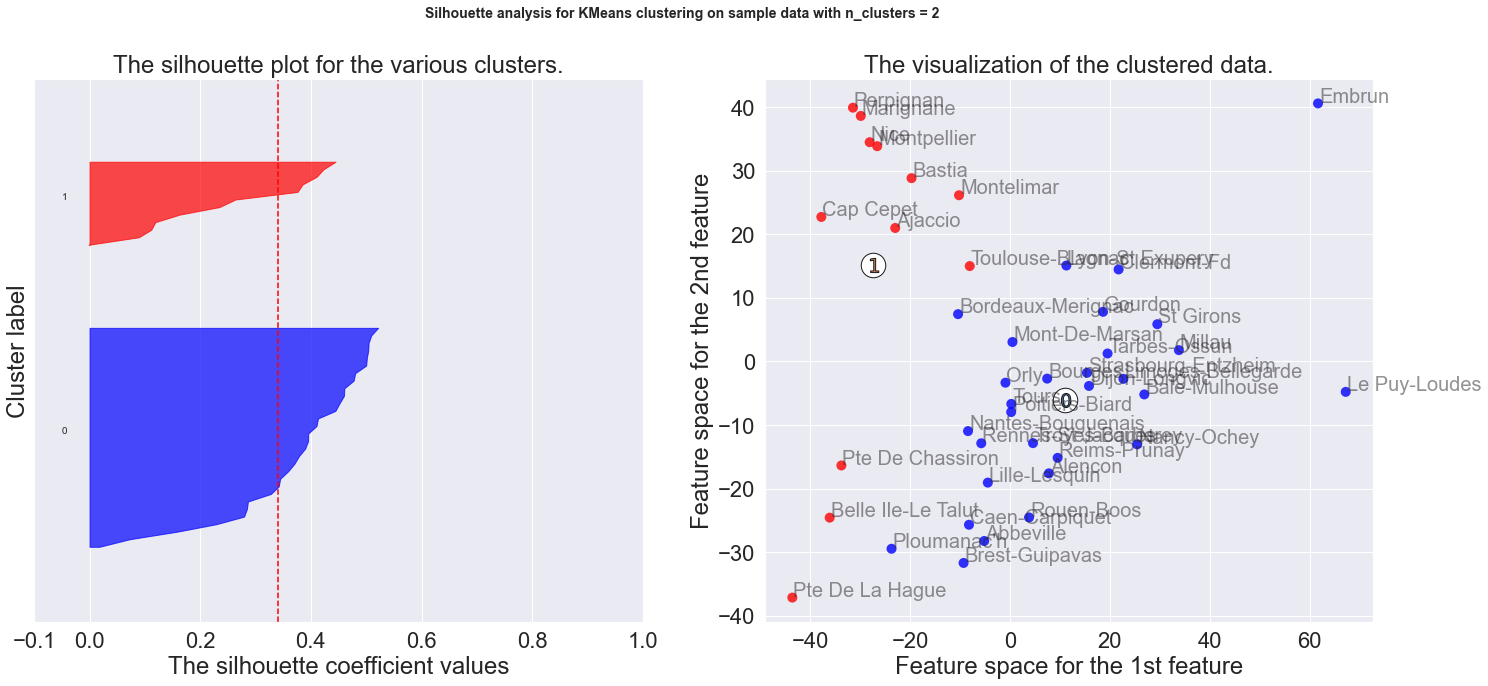

For n_clusters = 3 The average silhouette_score is : 0.3172199037212187


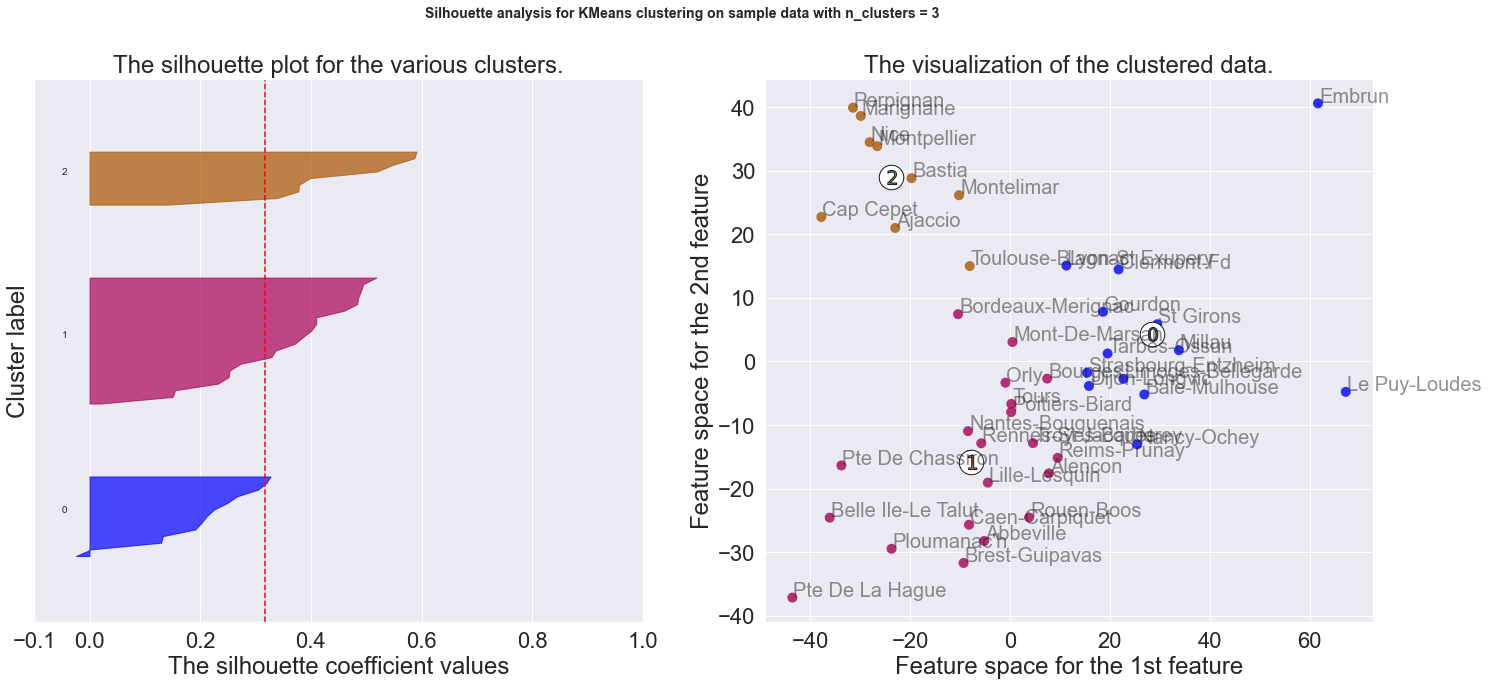

For n_clusters = 4 The average silhouette_score is : 0.3714167110557162


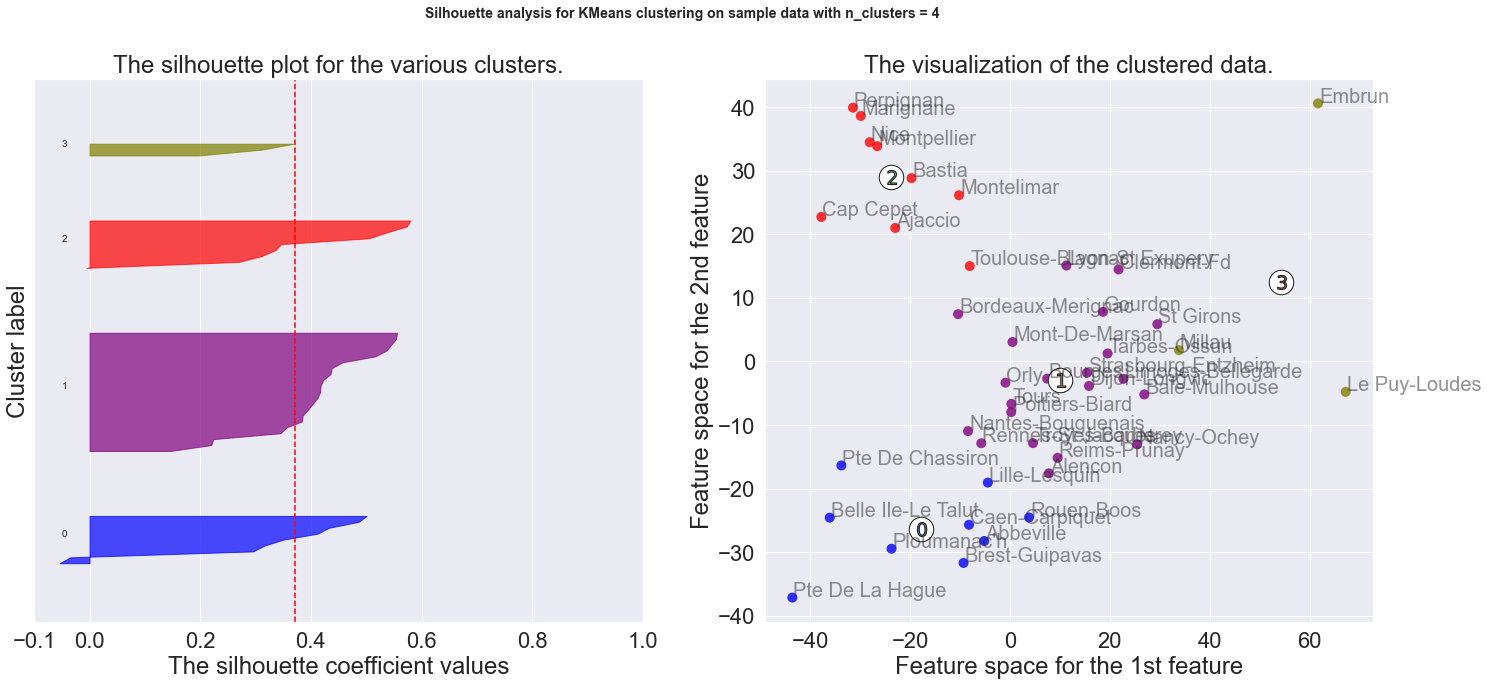

For n_clusters = 5 The average silhouette_score is : 0.3245939344005737


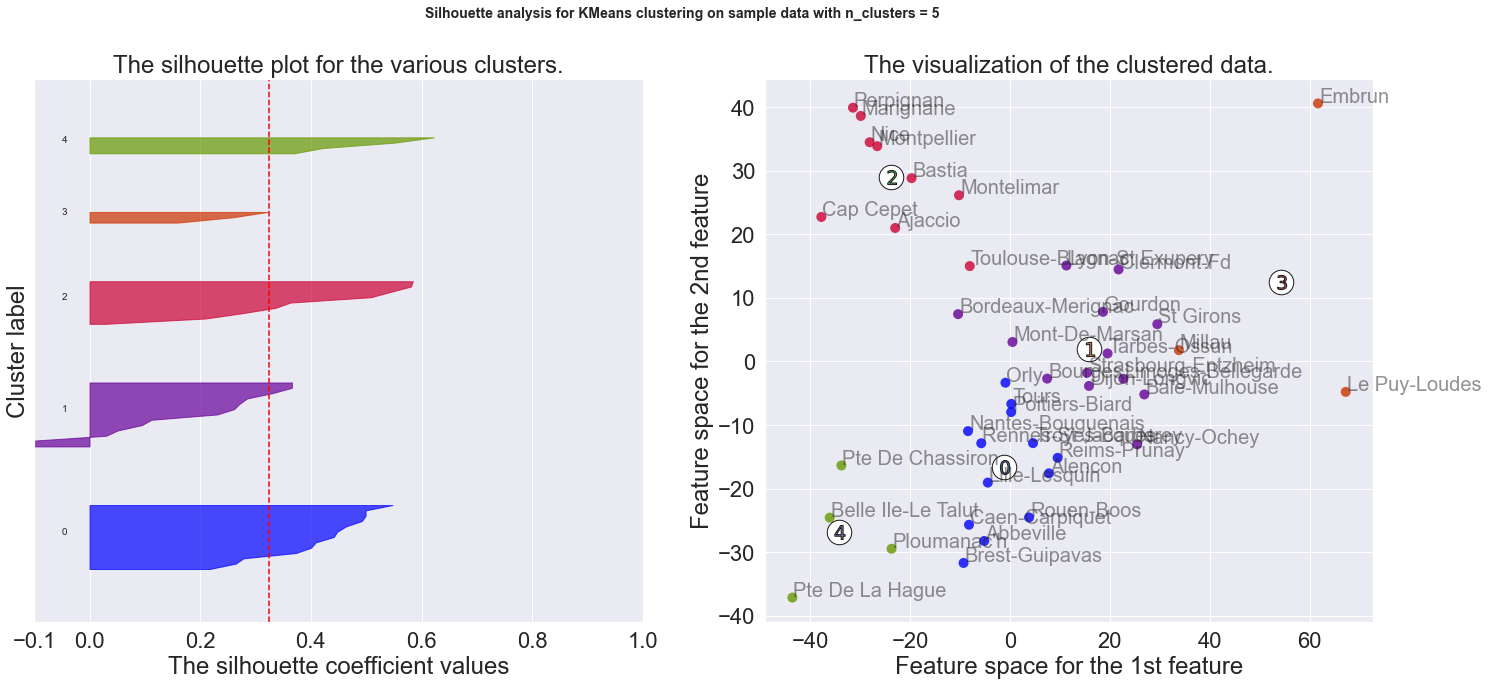

For n_clusters = 6 The average silhouette_score is : 0.32702366863937204


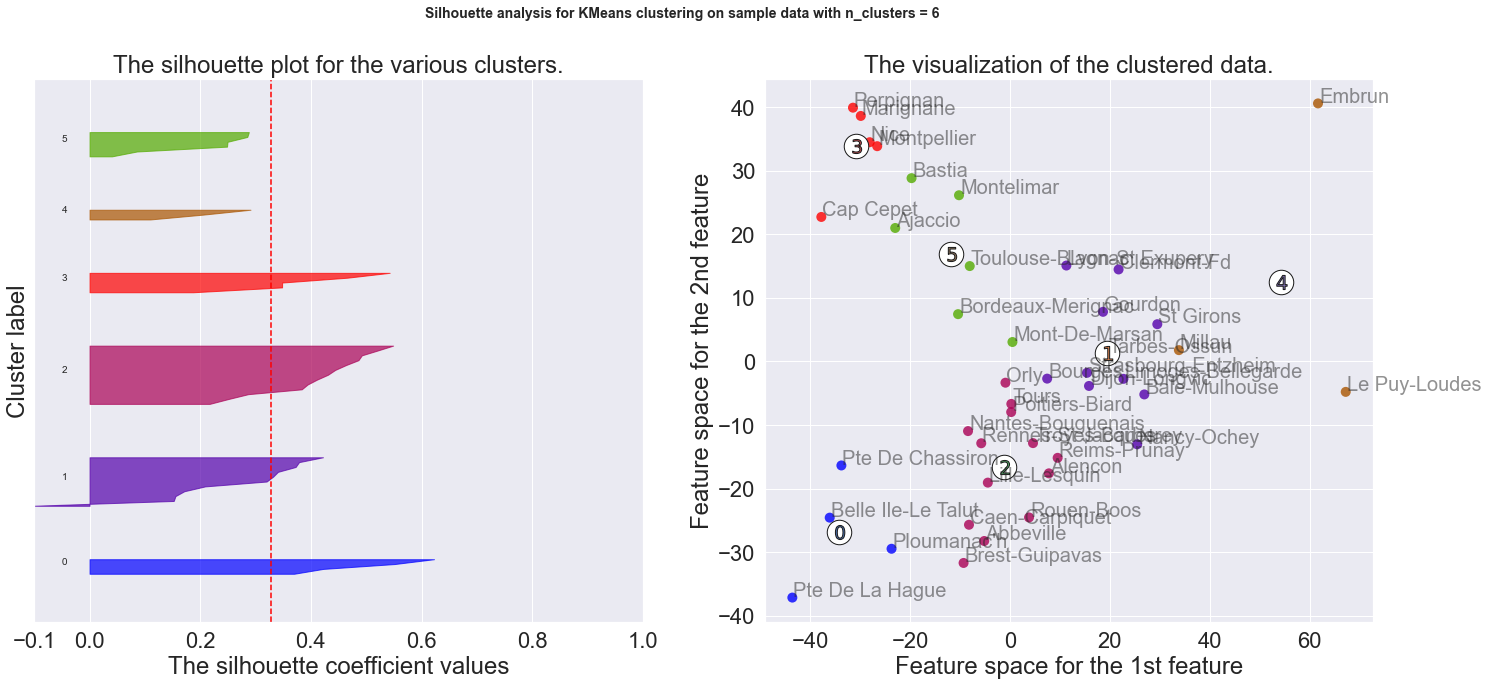

For n_clusters = 7 The average silhouette_score is : 0.32185183969242476


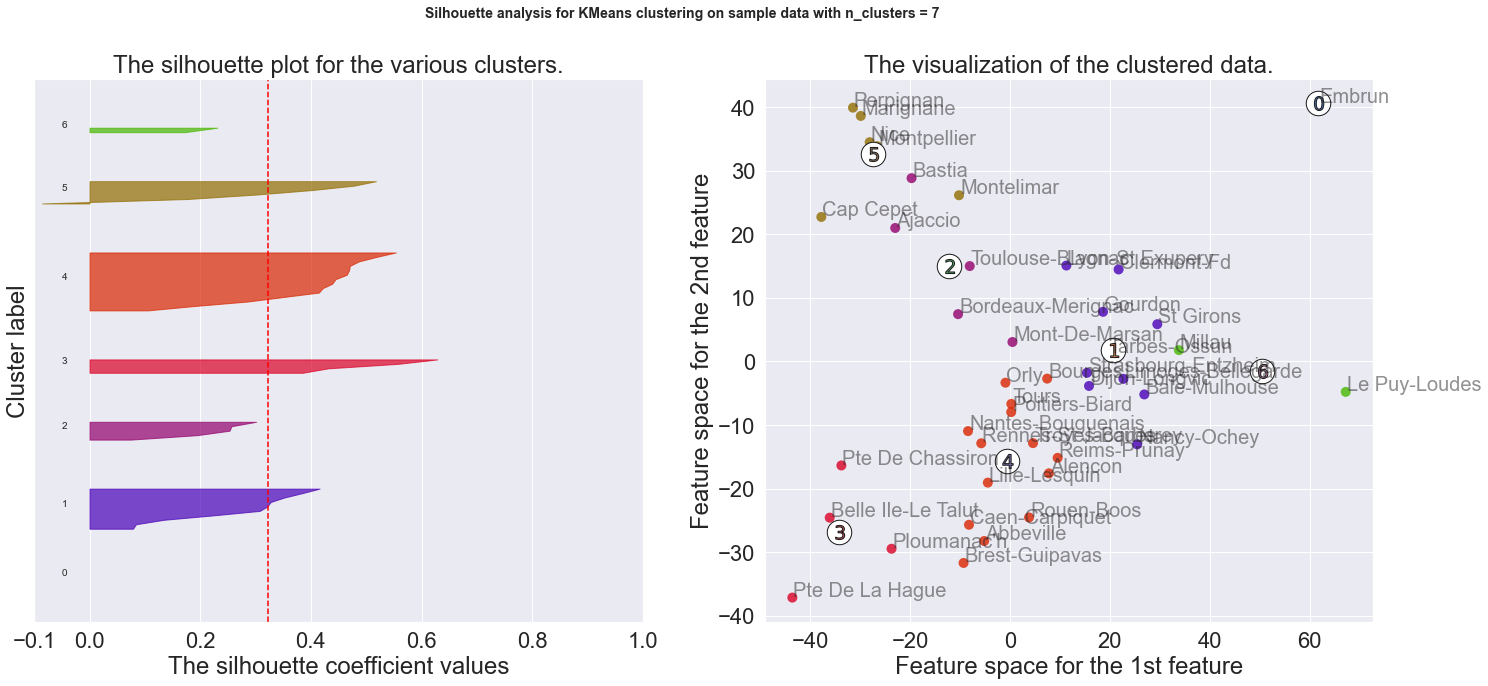

For n_clusters = 8 The average silhouette_score is : 0.26769387734706596


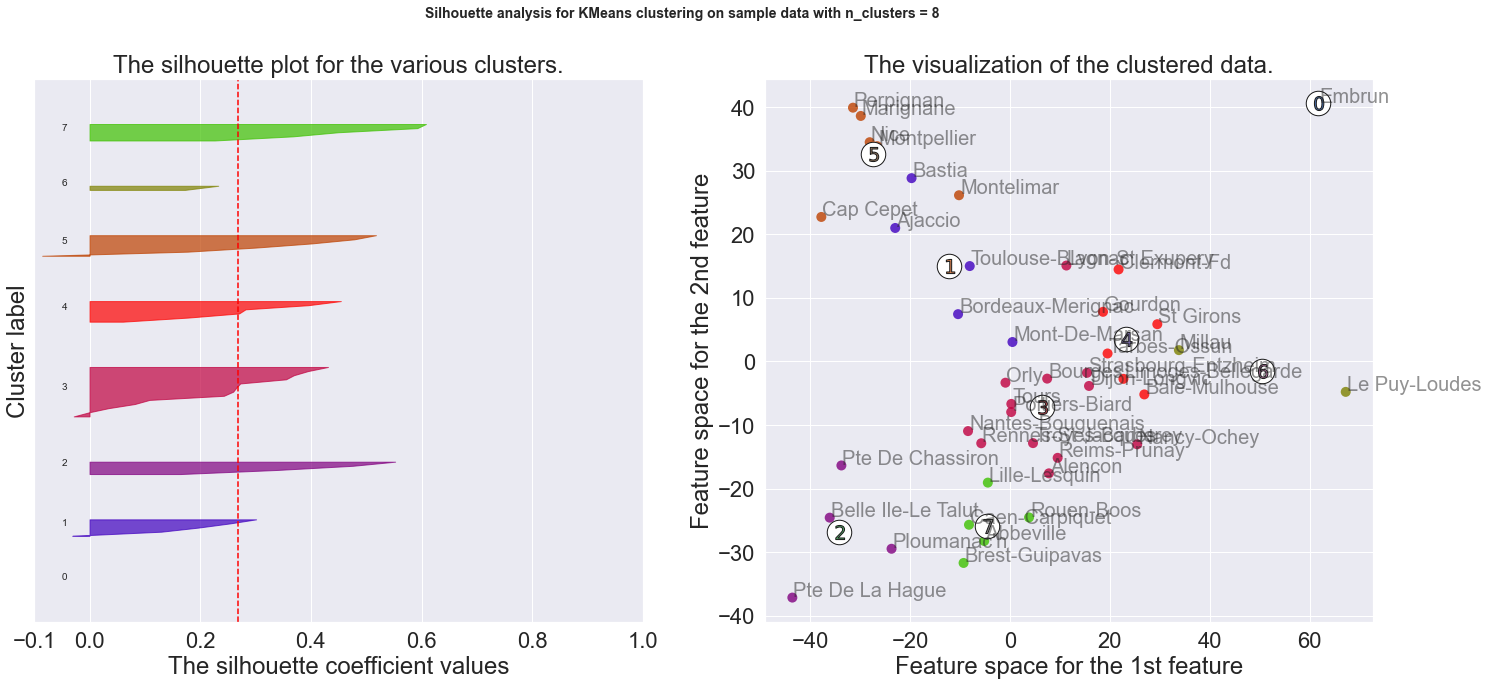

For n_clusters = 9 The average silhouette_score is : 0.2941301539599759


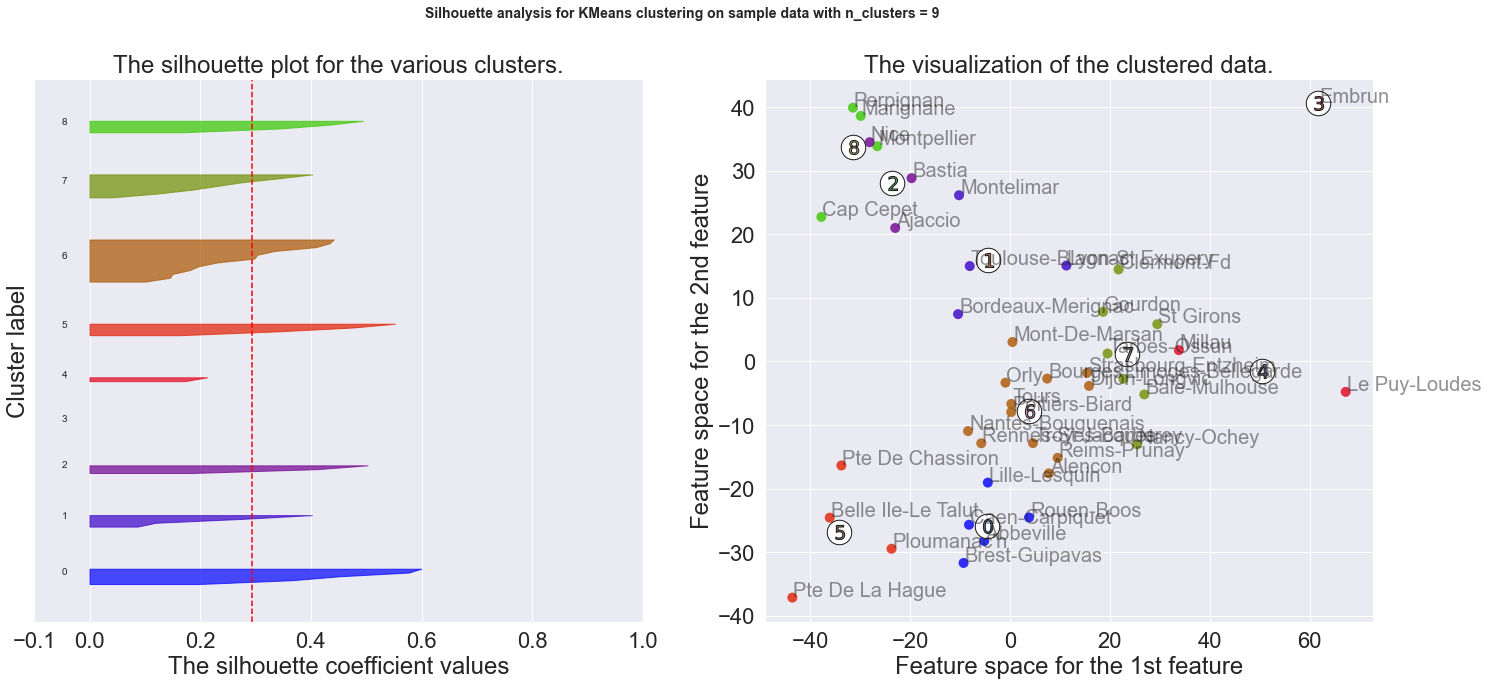

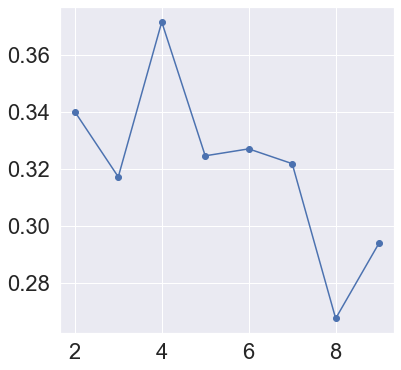

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score,  adjusted_mutual_info_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.2, point['y']+.2, str(point['val']), 
                fontproperties=font1, rotation=0,alpha=.5)

X =  dfPCA.iloc[:,:-4].values

cmap = cm.get_cmap("brg")
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

silhouettes = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(24, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouettes.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i       
        
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cmap(cluster_labels.astype(float) / n_clusters )
    label_point(dfPCA.Dim1,dfPCA.Dim2, dfPCA.Ville, ax2)
    
    ax2.scatter(X[:, 0], X[:, 1], 
                marker='.', 
                s=400, 
                lw=0, 
                alpha=0.8,
                c=colors, 
                edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], #marker='o',
                c="white", alpha=1, s=600, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=200, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()
    
plt.figure(figsize=(6,6))
plt.plot(range_n_clusters,silhouettes,marker='o')
plt.show()